# ĐỒ ÁN THỰC HÀNH - LT4KHDL

## A. Thu thập dữ liệu

### I. Giới thiệu chủ đề và thông tin tập dữ liệu


#### 1. Chủ đề
Tên chủ đề: Data Science Job Salaries

Tạm dịch: Mức lương cho công việc Khoa học dữ liệu

#### 2. Lý do lựa chọn chủ đề và tập dữ liệu
"Mức lương cho công việc Khoa học dữ liệu" là một trong những chủ đề hấp dẫn mang tính thực tế, hiện đang nhận được sự quan tâm lớn từ cộng đồng người theo học và làm việc trong lĩnh vực Khoa học dữ liệu.

Giúp cho những người quan tâm tới lĩnh vực Khoa học dữ liệu:

- Có cái nhìn tổng quát về sự thay đổi trong lĩnh vực này  từ năm 2020 đến hiện tại.
- Nắm bắt được xu thế làm việc và mức lương giữa các nghành nghề đang diễn ra trên thế giới.
- Cung cấp nhiều thông tin bổ ích nhằm đưa ra những định hướng về công việc trong tương lai.

Nguồn dữ liệu có sẵn với quy mô đóng góp trên toàn thế giới, đang được thu thập và cập nhật liên tục từ năm 2020 đến thời điểm hiện tại (thường là trên cơ sở hàng tuần). Bộ dữ liệu được công bố trong phạm vi công cộng, người dùng có thể truy cập và tải tập dữ liệu một cách dễ dàng.



#### 3. Thông tin tập dữ liệu
Nguồn gốc: https://salaries.ai-jobs.net/

Phương pháp thu thập: 
- Trang web cung cấp cho người dùng một biểu mẫu ngắn để trả lời khảo sát về công việc và mức lương hiện tại trong lĩnh vực Khoa học dữ liệu. Mọi thông tin của người dùng sẽ được ẩn danh. 
- Người dùng có thể đóng góp vào bộ dữ liệu bất cứ lúc nào và chỉ tốn chưa đầy một phút để hoàn thành biểu mẫu (được đính kèm hình ảnh bên dưới).


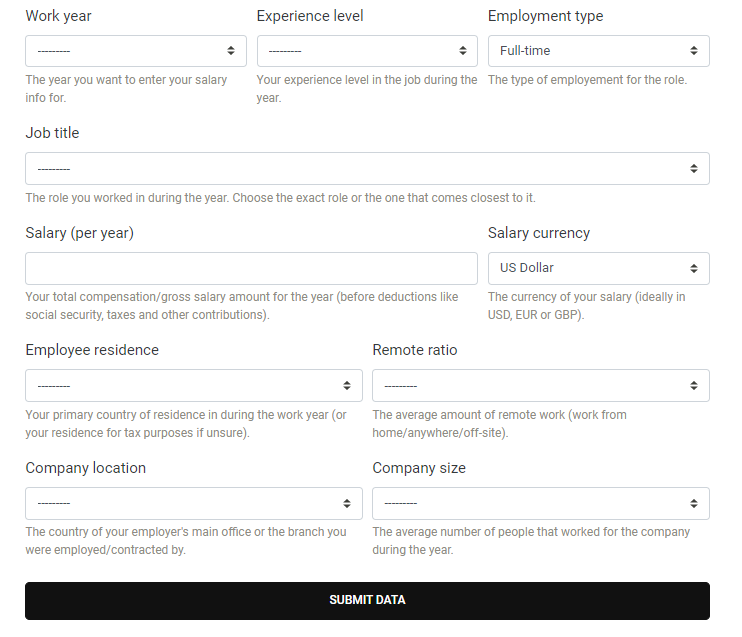

Giấy phép: Toàn bộ bộ dữ liệu được công bố trong phạm vi công cộng theo giấy phép CC0 (Public Domain).


### II. Tổng quan về cấu trúc tập dữ liệu

#### 1. Thời điểm thu thập dữ liệu
Tập dữ liệu được nhóm thống nhất tải ở dạng file csv vào ngày 13/11/2022, gồm 1423 dòng dữ liệu được trang web https://salaries.ai-jobs.net/ ghi nhận.
#### 2. Cấu trúc tập dữ liệu
Tập dữ liệu được tải xuống về cơ bản chứa một bảng duy nhất, gồm 11 thuộc tính với tất cả thông tin được cấu trúc và mô tả như sau:
- **work_year**: The year the salary was paid. 
- **experience_level**: The experience level in the job during the year with the following possible values
     - **EN** Entry-level
     - **MI** Junior Mid-level
     - **SE** Intermediate Senior-level
     - **EX** Expert Executive-level / Director
- **employment_type**:	The type of employement for the role
     - **PT** Part-time 
     - **FT** Full-time 
     - **CT** Contract 
     - **FL** Freelance
- **job_title**: The role worked in during the year.
- **salary**: The total gross salary amount paid.
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via [fxdata.foorilla.com](https://fxdata.foorilla.com/).
- **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio**: The overall amount of work done remotely, possible values are as follows
     - **0** No remote work (less than 20%) 
     - **50** Partially remote 
     - **100** Fully remote (more than 80%)
- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size**: The average number of people that worked for the company during the year
     - **S** less than 50 employees (small) 
     - **M** 50 to 250 employees (medium) 
     - **L** more than 250 employees (large)

# B. Khám phá dữ liệu

## I. Tổng quan bộ dữ liệu

### 1. Đọc dữ liệu và tính số dòng và cột

Đầu tiên ta import các thư viện cần thiết.

In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# .. import more libraries

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
!pip install country-converter
import country_converter as coco

Tiếp đến đọc file `"salaries.csv"` vào dataframe `salaries_df` và in ra 5 dòng đầu tiên của dataframe.

In [3]:
salaries_df = pd.read_csv('salaries.csv')
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Scientist,205000,USD,205000,US,100,US,M
1,2022,SE,FT,Data Scientist,185000,USD,185000,US,100,US,M
2,2022,SE,FT,Data Scientist,185900,USD,185900,US,0,US,M
3,2022,SE,FT,Data Scientist,129300,USD,129300,US,0,US,M
4,2022,SE,FT,Machine Learning Engineer,247500,USD,247500,US,0,US,M


Tính số dòng và số cột và lưu vào 2 biến `num_rows` và `num_cols`.

In [4]:
num_rows, num_cols = salaries_df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1423
Number of columns: 11


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Như đã được đề cập ở trên, dữ liệu được thu thập bằng cách điền vào một biểu mẫu trên trang web [https://salaries.ai-jobs.net/](https://salaries.ai-jobs.net/). Mỗi dòng trong tập dữ liệu này tương ứng với một bản ghi của một người dùng đã điền vào biểu mẫu. Mỗi dòng chứa các thông tin về thu nhập của người dùng trong một năm cụ thể, vị trí công việc, kinh nghiệm, quốc gia, loại hình công việc, v.v. Do vậy, ta có thể thấy rằng không có dòng nào bị "lạc loài".

### 3. Dữ liệu có các dòng bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương `duplicated()` và `any()` trên dataframe `salaries_df` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược.

In [5]:
have_duplicate_rows = salaries_df.duplicated().any()
have_duplicate_rows

True

Do vậy, ta có thể thấy rằng dữ liệu có các dòng bị lặp. Tuy vậy, ta không bỏ đi các dòng bị lặp vì tính chất của dữ liệu. Hai người khác nhau có thể có các thông tin thu nhập giống nhau trong một năm cụ thể.

### 4. Tỉ lệ giá trị thiếu và thống kê mô tả của từng cột

Ta cũng cần xem xét đến các giá trị thiếu trong dữ liệu. Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức `isnull()` trên dataframe `salaries_df` và tính tổng số giá trị thiếu của từng cột bằng phương thức `sum()`. Cuối cùng ta chia số dòng và lưu kết quả vào `missing_ratio`.

In [6]:
missing_ratio = salaries_df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

Có thể thấy, tỉ lệ giá trị thiếu đều là 0. Do vậy, ta kết luận rằng dữ liệu không có giá trị thiếu.

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức `describe()` trên dataframe `salaries_df`.

In [7]:
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1423.000000,1.423000e+03,1423.000000,1423.000000
mean,2021.735770,2.362726e+05,124448.492621,62.579058
std,0.547754,1.056179e+06,64414.030155,45.776892
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2022.000000,8.166600e+04,78000.000000,0.000000
50%,2022.000000,1.300000e+05,123648.000000,100.000000
75%,2022.000000,1.775500e+05,165400.000000,100.000000
max,2022.000000,3.040000e+07,450000.000000,100.000000


### 5. Kiểu dữ liệu của mỗi cột

Ta sử dụng phương thức `dtypes` trên dataframe `salaries_df` để xem kiểu dữ liệu của mỗi cột. Kết quả được lưu vào series `col_dtypes`; series này có index là tên các cột và giá trị là kiểu dữ liệu của các cột tương ứng.

In [8]:
col_dtype = salaries_df.dtypes
col_dtype

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

#### Nhận xét
- Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu này đã ở định dạng phù hợp, nên không cần phải xử lý.

### 6. Xem xét tập giá trị của các thuộc tính phân loại

In [9]:
set(salaries_df['work_year'].to_list())

{2020, 2021, 2022}

In [10]:
set(salaries_df['experience_level'].to_list())

{'EN', 'EX', 'MI', 'SE'}

In [11]:
set(salaries_df['employment_type'].to_list())

{'CT', 'FL', 'FT', 'PT'}

In [12]:
set(salaries_df['remote_ratio'].to_list())

{0, 50, 100}

In [13]:
set(salaries_df['company_size'].to_list())

{'L', 'M', 'S'}

In [14]:
set(salaries_df['employee_residence'].to_list())

{'AE',
 'AR',
 'AT',
 'AU',
 'AX',
 'BE',
 'BG',
 'BO',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CR',
 'CZ',
 'DE',
 'DK',
 'DO',
 'DZ',
 'EE',
 'EG',
 'ES',
 'FI',
 'FR',
 'GB',
 'GR',
 'HK',
 'HN',
 'HR',
 'HU',
 'ID',
 'IE',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JE',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'RO',
 'RS',
 'RU',
 'SG',
 'SI',
 'SK',
 'TH',
 'TN',
 'TR',
 'UA',
 'US',
 'VN'}

In [15]:
set(salaries_df['company_location'].to_list())

{'AE',
 'AL',
 'AR',
 'AS',
 'AT',
 'AU',
 'BE',
 'BO',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'EG',
 'ES',
 'FI',
 'FR',
 'GB',
 'GR',
 'HN',
 'HR',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'RO',
 'RU',
 'SG',
 'SI',
 'SK',
 'TH',
 'TR',
 'UA',
 'US',
 'VN'}

In [16]:
set(salaries_df['job_title'].to_list())

{'3D Computer Vision Researcher',
 'AI Scientist',
 'Analytics Engineer',
 'Applied Data Scientist',
 'Applied Machine Learning Scientist',
 'Applied Scientist',
 'BI Analyst',
 'BI Data Analyst',
 'Big Data Architect',
 'Big Data Engineer',
 'Business Data Analyst',
 'Cloud Data Architect',
 'Cloud Data Engineer',
 'Computer Vision Engineer',
 'Computer Vision Software Engineer',
 'Data Analyst',
 'Data Analytics Consultant',
 'Data Analytics Engineer',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Architect',
 'Data Engineer',
 'Data Engineering Manager',
 'Data Manager',
 'Data Operations Analyst',
 'Data Operations Engineer',
 'Data Science Consultant',
 'Data Science Engineer',
 'Data Science Lead',
 'Data Science Manager',
 'Data Science Tech Lead',
 'Data Scientist',
 'Data Scientist Lead',
 'Data Specialist',
 'Director of Data Engineering',
 'Director of Data Science',
 'ETL Developer',
 'Finance Data Analyst',
 'Financial Data Analyst',
 'Head of Data',
 'Head of 

#### Nhận xét 1:
Cách hiển thị giá trị bằng ký hiệu viết tắt ở một số thuộc tính sau có thể gây khó khăn hoặc nhầm lẫn cho người xem:
- experience_level
- employment_type
- employee_residence
- remote_ratio
- company_location
- company_size

#### Giải pháp:
Thay thế giá trị của các thuộc tính bị viết tắt thành từ đầy đủ nhằm để hiểu rõ ràng về dữ liệu và phục phụ cho quá trình trực quan hóa được rõ ràng hơn.

#### Thực hiện tiền xử lý:

In [17]:
# Experience Level
experience_level_dict={'EN':'Entry-level / Junior',
                       'MI':'Mid-level / Intermediate',
                       'SE':'Senior-level / Expert',
                       'EX':'Executive-level / Director'
                      }
salaries_df['experience_level']=salaries_df['experience_level'].map(experience_level_dict)

# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}
salaries_df['employment_type'] = salaries_df['employment_type'].map(employment_type_dict)

# Remote_ratio
salaries_df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)
salaries_df['remote_ratio']=salaries_df['remote_ratio'].astype(object)

#Employee Residence & Company location
## Mã Quốc gia chuẩn ISO
ISO3166 = {'AD': 'Andorra','AE': 'United Arab Emirates','AF': 'Afghanistan','AG': 'Antigua & Barbuda','AI': 'Anguilla',
           'AL': 'Albania','AM': 'Armenia','AN': 'Netherlands Antilles','AO': 'Angola','AQ': 'Antarctica','AR': 'Argentina',
           'AS': 'American Samoa','AT': 'Austria','AU': 'Australia','AW': 'Aruba','AZ': 'Azerbaijan','BA': 'Bosnia and Herzegovina',
           'BB': 'Barbados','BD': 'Bangladesh','BE': 'Belgium','BF': 'Burkina Faso','BG': 'Bulgaria','BH': 'Bahrain','BI': 'Burundi',
           'BJ': 'Benin','BM': 'Bermuda','BN': 'Brunei Darussalam','BO': 'Bolivia','BR': 'Brazil','BS': 'Bahama','BT': 'Bhutan',
           'BU': 'Burma (no longer exists)','BV': 'Bouvet Island','BW': 'Botswana','BY': 'Belarus','BZ': 'Belize','CA': 'Canada',
           'CC': 'Cocos (Keeling) Islands','CF': 'Central African Republic','CG': 'Congo','CH': 'Switzerland','CI': 'Côte D\'ivoire (Ivory Coast)',
           'CK': 'Cook Iislands','CL': 'Chile','CM': 'Cameroon','CN': 'China','CO': 'Colombia','CR': 'Costa Rica','CS': 'Czechoslovakia (no longer exists)',
           'CU': 'Cuba','CV': 'Cape Verde','CX': 'Christmas Island','CY': 'Cyprus','CZ': 'Czech Republic','DD': 'German Democratic Republic (no longer exists)',
           'DE': 'Germany','DJ': 'Djibouti','DK': 'Denmark','DM': 'Dominica','DO': 'Dominican Republic','DZ': 'Algeria','EC': 'Ecuador',
           'EE': 'Estonia','EG': 'Egypt','EH': 'Western Sahara','ER': 'Eritrea','ES': 'Spain','ET': 'Ethiopia','FI': 'Finland','FJ': 'Fiji',
           'FK': 'Falkland Islands (Malvinas)','FM': 'Micronesia','FO': 'Faroe Islands','FR': 'France','FX': 'France, Metropolitan','GA': 'Gabon',
           'GB': 'United Kingdom (Great Britain)','GD': 'Grenada','GE': 'Georgia','GF': 'French Guiana','GH': 'Ghana','GI': 'Gibraltar',
           'GL': 'Greenland','GM': 'Gambia','GN': 'Guinea','GP': 'Guadeloupe','GQ': 'Equatorial Guinea','GR': 'Greece','GS': 'South Georgia and the South Sandwich Islands',
           'GT': 'Guatemala','GU': 'Guam','GW': 'Guinea-Bissau','GY': 'Guyana','HK': 'Hong Kong','HM': 'Heard & McDonald Islands','HN': 'Honduras',
           'HR': 'Croatia','HT': 'Haiti','HU': 'Hungary','ID': 'Indonesia','IE': 'Ireland','IL': 'Israel','IN': 'India','IO': 'British Indian Ocean Territory',
           'IQ': 'Iraq','IR': 'Islamic Republic of Iran','IS': 'Iceland','IT': 'Italy','JM': 'Jamaica','JO': 'Jordan','JP': 'Japan','KE': 'Kenya',
           'KG': 'Kyrgyzstan','KH': 'Cambodia','KI': 'Kiribati','KM': 'Comoros','KN': 'St. Kitts and Nevis','KP': 'Korea, Democratic People\'s Republic of',
           'KR': 'Korea, Republic of','KW': 'Kuwait','KY': 'Cayman Islands','KZ': 'Kazakhstan','LA': 'Lao People\'s Democratic Republic','LB': 'Lebanon',
           'LC': 'Saint Lucia','LI': 'Liechtenstein','LK': 'Sri Lanka','LR': 'Liberia','LS': 'Lesotho','LT': 'Lithuania','LU': 'Luxembourg','LV': 'Latvia',
           'LY': 'Libyan Arab Jamahiriya','MA': 'Morocco','MC': 'Monaco','MD': 'Moldova, Republic of','MG': 'Madagascar','MH': 'Marshall Islands','ML': 'Mali',
           'MN': 'Mongolia','MM': 'Myanmar','MO': 'Macau','MP': 'Northern Mariana Islands','MQ': 'Martinique','MR': 'Mauritania','MS': 'Monserrat','MT': 'Malta',
           'MU': 'Mauritius','MV': 'Maldives','MW': 'Malawi','MX': 'Mexico','MY': 'Malaysia','MZ': 'Mozambique','NA': 'Namibia','NC': 'New Caledonia','NE': 'Niger',
           'NF': 'Norfolk Island','NG': 'Nigeria','NI': 'Nicaragua','NL': 'Netherlands','NO': 'Norway','NP': 'Nepal','NR': 'Nauru','NT': 'Neutral Zone (no longer exists)',
           'NU': 'Niue','NZ': 'New Zealand','OM': 'Oman','PA': 'Panama','PE': 'Peru','PF': 'French Polynesia','PG': 'Papua New Guinea','PH': 'Philippines','PK': 'Pakistan',
           'PL': 'Poland','PM': 'St. Pierre & Miquelon','PN': 'Pitcairn','PR': 'Puerto Rico','PT': 'Portugal','PW': 'Palau','PY': 'Paraguay','QA': 'Qatar','RE': 'Réunion',
           'RO': 'Romania','RU': 'Russian Federation','RW': 'Rwanda','SA': 'Saudi Arabia','SB': 'Solomon Islands','SC': 'Seychelles','SD': 'Sudan','SE': 'Sweden',
           'SG': 'Singapore','SH': 'St. Helena','SI': 'Slovenia','SJ': 'Svalbard & Jan Mayen Islands','SK': 'Slovakia','SL': 'Sierra Leone','SM': 'San Marino',
           'SN': 'Senegal','SO': 'Somalia','SR': 'Suriname','ST': 'Sao Tome & Principe','SU': 'Union of Soviet Socialist Republics (no longer exists)',
           'SV': 'El Salvador','SY': 'Syrian Arab Republic','SZ': 'Swaziland','TC': 'Turks & Caicos Islands','TD': 'Chad','TF': 'French Southern Territories',
           'TG': 'Togo','TH': 'Thailand','TJ': 'Tajikistan','TK': 'Tokelau','TM': 'Turkmenistan','TN': 'Tunisia','TO': 'Tonga','TP': 'East Timor',
           'TR': 'Turkey','TT': 'Trinidad & Tobago','TV': 'Tuvalu','TW': 'Taiwan, Province of China','TZ': 'Tanzania, United Republic of','UA': 'Ukraine',
           'UG': 'Uganda','UM': 'United States Minor Outlying Islands','US': 'United States of America','UY': 'Uruguay','UZ': 'Uzbekistan',
           'VA': 'Vatican City State (Holy See)','VC': 'St. Vincent & the Grenadines','VE': 'Venezuela','VG': 'British Virgin Islands',
           'VI': 'United States Virgin Islands','VN': 'Viet Nam','VU': 'Vanuatu','WF': 'Wallis & Futuna Islands','WS': 'Samoa','YD': 'Democratic Yemen (no longer exists)',
           'YE': 'Yemen','YT': 'Mayotte','YU': 'Yugoslavia','ZA': 'South Africa','ZM': 'Zambia','ZR': 'Zaire','ZW': 'Zimbabwe','ZZ': 'Unknown or unspecified country',
}

salaries_df['employee_residence'] = salaries_df['employee_residence'].map(ISO3166)
salaries_df['company_location'] = salaries_df['company_location'].map(ISO3166)

#Company Size
company_size_dict={'S': 'Small',
                  'M':'Medium',
                  'L':'Large'}
salaries_df.company_size=salaries_df['company_size'].map(company_size_dict)

#### Nhận xét 2:
- Có rất nhiều thể loại công việc được liệt kê ở đây (65 loại).
- Xuất hiện rất nhiều những tiêu đề công việc có thể xếp chung vào một lĩnh vực:
     - Vd: Financial Data Analyst, Product Data Analyst, Business Data Analyst,...có thể gọi chung là Data Analyst.
     - Vd: Cloud Data Architect, Principal Data Architect, Big Data Architect',...có thể gọi chung là Data Architect.
- Thậm chí xuất hiện một số công việc được thể hiện ở cả 2 loại tên (điều này có thể xem xét là sự trùng lặp):
     - Vd: Machine Learning Engineer và ML Engineer đều được hiểu là Machine Learning Engineer.
     - Vd: Financial Data Analyst và Finance Data Analyst.
- Tác hại: chưa nghĩ ra :(

#### Giải pháp:
Để phù hợp với mục đích khám phá và phân tích dữ liệu, chúng ta sẽ phân chia các tiêu đề công việc vào các thùng tổng quát thích hợp. Ở đây nhóm đã phân loại và chia thành các nhóm chính sau:
- Data Scientist                
- Data Engineer                 
- Data Analyst
- Data Architect
- Machine Learning Engineer                     
- Machine Learning Scientist
- Computer Vision Engineer
- NLP Engineer
- Research Scientist                  
- AI Scientist
- Applied Scientist

#### Thực hiện tiền xử lý:

In [18]:
#mapping the new classification type
employment_classification = {'Data Scientist':'Data Scientist',
                             'Principal Data Scientist':'Data Scientist',
                             'Applied Data Scientist':'Data Scientist',
                             'Data Science Manager':'Data Scientist',
                             'Head of Data Science':'Data Scientist',
                             'Director of Data Science':'Data Scientist',
                             'Staff Data Scientist':'Data Scientist',
                             'Data Science Consultant':'Data Scientist',
                             'Data Science Engineer':'Data Scientist',
                             'Head of Data':'Data Scientist',
                             'Lead Data Scientist':'Data Scientist',
                             'Data Scientist Lead':'Data Scientist',
                             'Data Science Lead':'Data Scientist',
                             'Product Data Scientist':'Data Scientist',
                             'Data Specialist':'Data Scientist',
                             
                             'Big Data Engineer':'Data Engineer',
                             'Data Engineer':'Data Engineer',
                             'Principal Data Engineer':'Data Engineer',
                             'Data Operations Engineer':'Data Engineer',
                             'Lead Data Engineer':'Data Engineer',
                             'Director of Data Engineering':'Data Engineer',
                             'Research Engineer':'Data Engineer',
                             'Data Engineering Manager':'Data Engineer',
                             'Cloud Data Engineer':'Data Engineer',
                             'Data Science Tech Lead':'Data Engineer',
                             'Data Manager':'Data Engineer',
                             'ETL Developer':'Data Engineer',

                             'Product Data Analyst':'Data Analyst',
                             'Data Analyst':'Data Analyst',
                             'Business Data Analyst':'Data Analyst',
                             'Data Science Consultant':'Data Analyst',
                             'BI Data Analyst':'Data Analyst',
                             'BI Analyst':'Data Analyst',
                             'Lead Data Analyst':'Data Analyst',
                             'Data Analytics Engineer':'Data Analyst',
                             'Marketing Data Analyst':'Data Analyst',
                             'Financial Data Analyst':'Data Analyst',
                             'Finance Data Analyst':'Data Analyst',
                             'Principal Data Analyst':'Data Analyst',
                             'Data Analytics Manager':'Data Analyst',
                             'Data Analytics Lead':'Data Analyst',
                             'Analytics Engineer':'Data Analyst',
                             'Data Operations Analyst':'Data Analyst',
                             'Data Analytics Consultant':'Data Analyst',
                             'Power BI Developer':'Data Analyst',
                             
                             'Machine Learning Scientist':'Machine Learning Scientist',
                             'Applied Machine Learning Scientist':'Machine Learning Scientist',
                             'Machine Learning Research Engineer':'Machine Learning Scientist',
                             'Head of Machine Learning':'Machine Learning Scientist',
                             'Machine Learning Manager':'Machine Learning Scientist',
                             
                             'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                             'Machine Learning Engineer':'Machine Learning Engineer',
                             'ML Engineer':'Machine Learning Engineer',
                             'Lead Machine Learning Engineer':'Machine Learning Engineer',
                             'Machine Learning Developer':'Machine Learning Engineer',
                             
                             'Data Architect':'Data Architect',
                             'Cloud Data Architect':'Data Architect',
                             'Principal Data Architect':'Data Architect',
                             'Big Data Architect':'Data Architect',
                             
                             'Computer Vision Engineer':'Computer Vision Engineer',
                             'Computer Vision Software Engineer':'Computer Vision Engineer',
                             '3D Computer Vision Researcher':'Computer Vision Engineer',
                             
                             'NLP Engineer':'NLP Engineer',
                             'AI Scientist':'AI Scientist',
                             'Research Scientist':'Research Scientist',
                             'Applied Scientist':'Applied Scientist',
                            }

salaries_df["job_title"] = salaries_df["job_title"].map(employment_classification)

### 7. Xem xét sự phân bố giá trị của các cột dữ liệu dạng số.

In [19]:
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

Ta thấy sau các bước tiền xử lý ở trên có 3 cột dữ liệu kiểu số là: work_year, salary, salary_in_usd.

Thực hiện thống kê trên 3 cột này và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Giá trị min (min).
- Giá trị lower quartile (phân vị 25) (lower_quartile).
- Giá trị median (phân vị 50) (median).
- Giá trị upper quartile (phân vị 75) (upper_quartile).
- Giá trị max (max).

In [20]:
numeric_df=salaries_df.copy()
numeric_df=numeric_df[['work_year', 'salary', 'salary_in_usd']]
columns=list(numeric_df.columns)
titles=['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max']
arrays=numeric_df.to_numpy()
num_col_dict={}
num_col_vals=[]
for i in range(len(columns)):
    temp=[]
    temp.append(((sum(np.isnan(arrays[:,i]))/arrays.shape[0])*100).round(3))
    temp.append(np.nanmin(arrays[:,i],axis=0).round(1))
    temp.append(np.nanpercentile(arrays[:,i],25,axis=0).round(3))
    temp.append(np.nanpercentile(arrays[:,i],50,axis=0).round(3))
    temp.append(np.nanpercentile(arrays[:,i],75,axis=0).round(3))
    temp.append(np.nanmax(arrays[:,i],axis=0).round(3))
    num_col_vals.append(temp)
for i in range(len(columns)):
    num_col_dict[columns[i]]=num_col_vals[i]
    num_col_dict['titles']=titles
numeric_info_df=pd.DataFrame(num_col_dict).set_index('titles')
numeric_info_df

,work_year,salary,salary_in_usd
titles,,,
missing_ratio,0.0,0.0,0.0
min,2020.0,2324.0,2324.0
lower_quartile,2022.0,81666.0,78000.0
median,2022.0,130000.0,123648.0
upper_quartile,2022.0,177550.0,165400.0
max,2022.0,30400000.0,450000.0


**Nhận xét:**
- Các cột dạng số không có giá trị thiếu, có thể là do cách thu thập thông tin thật sự hiệu quả từ trang web khi thu thập bằng cách cho những người tham gia khảo sát trên toàn thế giới điền biểu mẫu với số lượng thuộc tính vừa phải, và điền một cách ẩn danh do đó những thông tin cơ bản nhưng quan trọng như năm bắt đầu làm việc hay tiền lương thì người dùng có thể sẵn sàng điền một cách nhanh chóng.
- Cách biệt giữa giá trị min và max của cột salary khá lớn là do sự khác biệt về đơn vị tiền tệ ở mỗi quốc gia. Do đó việc có cột salary_in_usd là cần thiết cho quá trình trực quan hóa.

### 8. Xem xét sự phân bố giá trị của các cột dữ liệu không phải dạng số.

Thực hiện thống kê và lưu vào một dataframe với các dòng là đại diện cho các giá trị như sau:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu (missing_ratio).
- Số lượng các giá trị khác nhau (không xét giá trị thiếu) (num_values).
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios).

In [21]:
categorical_df=salaries_df.select_dtypes(exclude=['int64'])
col_names=list(categorical_df.columns)
titles=["missing_ratio", "num_values", "value_ratios"]
values_list=[]
dic={}
for i in col_names:
    df=categorical_df.copy()[[i]]
    size=len(df)
    new=list(df[i].values)
    df[i]=new
    temp=[]
    temp.append(((df[i].isnull().sum()/size)*100).round(3))
    df.dropna(inplace=True)
    vals=list(df[i].values)
    num_vals=list(set(vals))
    temp.append(len(num_vals))
    temp2={}
    new=[(df[i].value_counts()[j]/len(vals)*100).round(3) for j in num_vals]
    temp2={num_vals[j]:new[j] for j in range(len(num_vals))}
    temp2_sort={k:v for k,v in sorted(temp2.items(), key= lambda item:item[1], reverse=True)}
    temp.append(temp2_sort)
    values_list.append(temp)
dic={col_names[i]:values_list[i] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
titles,,,,,,,,
missing_ratio,0.0,0.0,0.0,0.0,0.211,0.0,0.0,0.0
num_values,4,4,11,18,62,3,60,3
value_ratios,"{'Senior-level / Expert': 61.279, 'Mid-level /...","{'Full Time': 98.103, 'Part Time': 0.984, 'Con...","{'Data Scientist': 31.483, 'Data Engineer': 28...","{'USD': 77.442, 'EUR': 9.628, 'GBP': 5.833, 'I...","{'United States of America': 69.789, 'United K...","{'Fully Remote': 57.625, 'On-site': 32.467, 'P...","{'United States of America': 71.75, 'United Ki...","{'Medium': 69.079, 'Large': 22.839, 'Small': 8..."


**Nhận xét:**
- Hầu như cũng gần như không có giá trị thiếu ở các cột không phải dạng số này.
- Ta thấy phần trăm của loại làm việc từ xa toàn thời gian (Fully Remote) là cao nhất có thể là do bộ dữ liệu nhóm đang dùng là trong khoảng thời gian từ năm 2020 đến năm 2022 do đó ảnh hưởng của dịch covid-19 đã làm cho phần trăm số lượng người làm việc từ xa tăng lên đáng kể.

# C + D

## Câu hỏi 1

### Nội dung câu hỏi 
Mức lương trung bình của công việc khoa học dữ liệu biến động như thế nào trong những năm gần đây ở trên thế giới ?


### Ý nghĩa khi trả lời được câu hỏi
Có cái nhìn tổng quát về sự thay đổi của mức lương trung bình trong lĩnh vực Khoa học dữ liệu trong ba năm (2020, 2021, 2022). Từ đó, thấy được xu hướng phát triển và lý giải được nguyên nhân thực tế làm tăng/giảm của mức lương.

### Tiền xử lý
Không cần thiết cho câu hỏi này.

### Phân tích dữ liệu để trả lời cho các câu hỏi

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:

Bước 1: Tạo dataframe 'salary_timeline' gồm 2 thuộc tính: 'work_year' (để lưu 3 năm: 2020, 2021, 2022), 'mean_salary_in_usd' (lưu mức lương trung bình của năm tương ứng).

Bước 2: 
- Tiến hành trực quan hóa bằng lineplot (thư viện seaborn) trong đó: trục hoành là năm (work_year) và trục tung sẽ là mức lương trung bình (salary_in_usd)
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.


**Code bước 1:**

In [22]:
salary_timeline = pd.DataFrame(salaries_df.groupby("work_year")["salary_in_usd"].mean())
salary_timeline = salary_timeline.reset_index()
salary_timeline.rename(columns = {'salary_in_usd':'mean_salary_in_usd'}, inplace = True)
salary_timeline["work_year"].replace({2020:"2020",2021:"2021",2022:"2022"},inplace=True)
print(f"Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này :")
salary_timeline

Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này :


,work_year,mean_salary_in_usd
0,2020,92644.413333
1,2021,93616.787611
2,2022,132784.741533


**Code bước 2:**

Chúng ta hãy nhìn vào sự thay đổi theo dòng thời gian của mức lương trung bình :


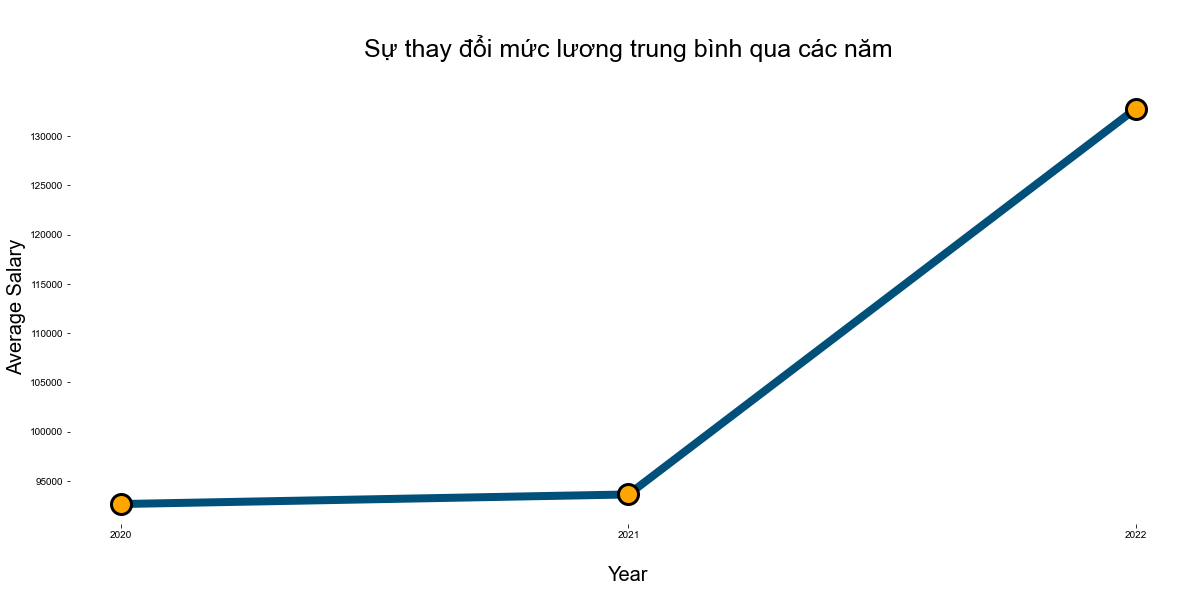

In [23]:
palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
print(f"Chúng ta hãy nhìn vào sự thay đổi theo dòng thời gian của mức lương trung bình :")
plt.subplots(figsize=(20,8))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

p=sns.lineplot(x=salary_timeline["work_year"] ,y=salary_timeline["mean_salary_in_usd"],data=salary_timeline,color=palette[1],marker="o",linewidth=8,markersize=20,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\nSự thay đổi mức lương trung bình qua các năm\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Average Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

### Nhận xét

Mức lương trung bình trong lĩnh vực Khoa học dữ liệu có xu hướng tăng từ năm 2020 đến năm 2022:
- Tăng nhẹ trong khoảng từ 2020 đến 2021: từ 92644 - > 93616 (usd)
- Tăng mạnh trong khoảng từ 2021 đến 2022:  từ 93616 -> 132784 (usd)

Điều này cho thấy lĩnh vực Khoa học dữ liệu đang ngày càng đóng vai trò quan trọng, trở thành xu thế nghề nghiệp được ưa chuộng, nguồn nhân lực được các công ty trên thế giới sẳn sàng săn đón với mức lương hậu hĩnh.

## Câu hỏi 2:

### Nội dung câu hỏi 
Đâu là mảnh đất lý tưởng cho việc lựa chọn nơi làm việc cho các nghành thuộc lĩnh vực Khoa học dữ liệu? 

### Ý nghĩa khi trả lời được câu hỏi
Giúp cho người tìm việc chọn được các quốc gia nơi mà lĩnh vực Khoa học dữ liệu đang phát triển, sẵn sàng chi trả cho nguồn nhân lực với mức lương hấp dẫn. 

### Tiền xử lý

Để trả lời được câu hỏi này một cách sinh động nhất, chúng ta sẽ xử lý dữ liệu để có thể trực quan hóa kết quả trên bản đồ thế giới (sử dụng thư viện px.choropleth)

Cách xử lý: Để sử dụng được thư viện px.choropleth, thì tên của quốc gia phải ở dạng ISO (Tổ chức tiêu chuẩn hoá quốc tế), vì vậy cần phải chuyển đổi giá trị cột 'company_location' về dạng mã ISO.


**Code**

In [24]:
country_names = coco.convert(names=salaries_df['company_location'], to="ISO3")
salaries_df['company_location'] = country_names
print(f"Sau khi chuyển tên quốc gia về mã ISO ta có :")
salaries_df['company_location'].unique()

Sau khi chuyển tên quốc gia về mã ISO ta có :


array(['USA', 'HUN', 'GBR', 'CHE', 'DEU', 'AUT', 'SVK', 'IND', 'ESP',
       'FRA', 'CAN', 'MEX', 'BRA', 'AUS', 'SGP', 'PRT', 'NGA', 'CZE',
       'TUR', 'PRI', 'FIN', 'ASM', 'THA', 'NLD', 'GRC', 'DNK', 'BOL',
       'PHL', 'ALB', 'ARG', 'BEL', 'IDN', 'EGY', 'ITA', 'ARE', 'IRL',
       'LUX', 'SVN', 'MYS', 'EST', 'POL', 'HND', 'PAK', 'JPN', 'DZA',
       'ROU', 'IRQ', 'RUS', 'UKR', 'CHN', 'KEN', 'COL', 'NZL', 'IRN',
       'CHL', 'MDA', 'VNM', 'HRV', 'ISR', 'MLT'], dtype=object)

### Phân tích dữ liệu để trả lời cho các câu hỏi

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:

Bước 1: Tạo dataframe 'average_salary' gồm có 2 thuộc tính là 'company_location' và 'mean_salary_in_usd':
- 'company_location': thể hiện mã các quốc gia theo ISO.
- 'mean_salary_in_usd': thể hiện giá trị trung bình về lương (trong vòng 3 năm) của các quốc gia tương ứng.

Bước 2: 
- Tiến hành trực quan hóa bằng biểu đồ choropleth (thư viện plotly.express) trong đó: giá trị mức lương trung bình (mean_salary_in_usd) của từng quốc gia (company_location) sẽ được hiển thị theo màu sắc trên bảng đồ thế giới.
- Điều chỉnh các tham số và thiết kế các layout sao cho hình ảnh trực quan được rõ ràng và đẹp mắt. 

**Code bước 1:**

In [25]:
salary_location_df = salaries_df.groupby(['salary_in_usd', 'company_location']).size().reset_index()
average_salary = salary_location_df.groupby('company_location').mean().reset_index()
average_salary.rename(columns = {'salary_in_usd':'mean_salary_in_usd'}, inplace = True)
average_salary = average_salary[['company_location','mean_salary_in_usd']]
print(f"Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này :")
average_salary

Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này :


,company_location,mean_salary_in_usd
0,ALB,2324.000000
1,ARE,100000.000000
2,ARG,50000.000000
3,ASM,34026.500000
4,AUS,83578.250000
5,AUT,71377.666667
6,BEL,76895.250000
7,BOL,7500.000000
8,BRA,34396.454545
9,CAN,110812.200000


**Code bước 2:**

In [26]:
print(f"Chúng ta hãy nhìn vào mức lương trung bình của các quốc gia:")

fig = px.choropleth(locations=average_salary['company_location'],
                    color=average_salary['mean_salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.RdBu,
                    template='plotly_dark')
fig.update_layout(font = dict(size=17,family="Courier new"))

fig.update_layout(
    title="Average Salary by Company Location", title_x=0.5,
    font=dict(
        family="Rubik",
        size=18
    )
)

fig.show()

Chúng ta hãy nhìn vào mức lương trung bình của các quốc gia:


### Nhận xét
Dựa vào hình ảnh được trực quan ta có thể thấy, các quốc gia có mức lương trung bình rất cao đó là: Nga (157.5k), Mỹ (151.1707k), New Zealand (125k), Nhật Bản (114.1273k), Canada (110.8122k). 

Đây đều là nhưng quốc gia phát triển hàng đầu thế giới về mọi lĩnh vực và các quốc gia này sẵn sàng chi trả mức lương cho nguồn nhân lực trong lĩnh vực Khoa học dữ liệu rất hậu hĩnh. Điều đó chứng tỏ Khoa học dữ liệu là một lĩnh vực nghề nghiệp quan trọng trong sự phát triển của đất nước và người lao động có thể cân nhắc lựa chọn các quốc gia này để phát triển sự nghiệp và có mức thu nhập tốt.

## Câu hỏi 3:

### Nội dung câu hỏi

Các công việc nào được làm nhiều nhất ở mỗi quốc gia?(Thống kê dựa trên những khảo sát của dataset này). 

### Ý nghĩa khi trả lời được câu hỏi
- Người đọc ở một quốc gia cụ thể có thể định hướng về nghề nghiệp tương lai cho bản thân.
- Có thông tin về cơ hội việc làm ở trong nước hay các quốc gia khác.
- So sánh với các năm 2020 và 2021 để xem xét sự thay đổi số lượng nhân viên trong một công việc cụ thể để biết liệu công việc có bị bão hòa hay vẫn còn cần nhu cầu nhân viên.

### Tiền xử lý

Không cần thiết cho câu hỏi này

### Phân tích dữ liệu để trả lời cho câu hỏi

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Tạo một DataFrame với các dòng là chỉ số năm làm việc, các cột là các quốc gia, các giá trị là những dictionary với keys là tên ngôn ngữ và values là tỉ lệ phần trăm người sử dụng ngôn ngữ đó(tính trong một quốc gia) được sắp xếp giảm dần.
- Do có nhiều quốc gia nên trực quan hóa dạng biểu đồ sẽ quá phức tạp và không rõ ràng. Nên đối với câu hỏi này việc trực quan được thể hiện ngay trên dataframe để rõ ràng và dễ nhìn hơn.

**Code:**

In [27]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
def get_country_jobs(data,year):
    country_col,job_col='employee_residence','job_title'
    df=data.copy()[[country_col,job_col]]
    #loại các dòng có quốc gia hoặc công việc là nan
    df.dropna(inplace=True)
    country_names=list(set(list(df[country_col].values)))
    country_vals=[]
    for c in country_names:
        sub_df=df[df[country_col]==c]
        jobs=list(sub_df[job_col].values)
        jobs=[i.split(';') for i in jobs]
        jbs=np.array([j for i in jobs for j in i])
        n,c=np.unique(jbs,return_counts=True)[0],np.unique(jbs,return_counts=True)[1]
        c=((c/jbs.shape[0])*100).round(1)
        n,c=list(n),list(c)
        dic_jbs=dict(zip(n,c))
        dic_jbs_sort={k:v for k,v in sorted(dic_jbs.items(), key= lambda item:item[1], reverse=True)}
        temp=[]
        temp.append(dic_jbs_sort)
        country_vals.append(temp)
    country_jobs_dict={country_names[i]:country_vals[i] for i in range(len(country_names))}
    country_jobs_dict['titles']=year
    country_jobs_df=pd.DataFrame(country_jobs_dict).set_index('titles')
    return country_jobs_df
df2020=get_country_jobs(salaries_df[salaries_df['work_year']==2020],'2020')
df2021=get_country_jobs(salaries_df[salaries_df['work_year']==2021],'2021')
df2022=get_country_jobs(salaries_df[salaries_df['work_year']==2022],'2022')
country_jobs_df=pd.concat([df2020, df2021, df2022], axis=0)
country_jobs_df

C:\Users\PhiHungTF\AppData\Local\Temp\ipykernel_14472\194097049.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,Netherlands,Honduras,Hungary,Spain,Canada,Denmark,France,China,New Zealand,Germany,United Kingdom (Great Britain),Mexico,United States of America,Greece,Italy,Croatia,India,Poland,Pakistan,Austria,Portugal,United Arab Emirates,Nigeria,Philippines,Japan,Russian Federation,Malta,Ukraine,Puerto Rico,Romania,"Moldova, Republic of",Luxembourg,Colombia,Bulgaria,Kenya,Slovenia,Hong Kong,Thailand,Chile,Belgium,Turkey,Islamic Republic of Iran,Singapore,Viet Nam,Iraq,Brazil,Czech Republic,Australia,Dominican Republic,Slovakia,Ireland,Switzerland,Egypt,Bolivia,Algeria,Costa Rica,Malaysia,Argentina,Tunisia,Indonesia,Estonia,Finland
titles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,{'Research Scientist': 100.0},{'Data Analyst': 100.0},{'Data Scientist': 100.0},"{'Data Engineer': 66.7, 'Data Scientist': 33.3}",{'Machine Learning Scientist': 100.0},{'AI Scientist': 100.0},"{'Data Scientist': 66.7, 'Data Analyst': 16.7, 'Data Engineer': 16.7}",{'Machine Learning Engineer': 100.0},{'Data Engineer': 100.0},"{'Data Scientist': 66.7, 'Data Engineer': 16.7, 'Machine Learning Engineer': 16.7}","{'Data Engineer': 66.7, 'Data Scientist': 33.3}",{'Data Engineer': 100.0},"{'Data Scientist': 36.0, 'Data Analyst': 32.0, 'Data Engineer': 16.0, 'Machine Learning Engineer': 12.0, 'Research Scientist': 4.0}","{'Data Engineer': 50.0, 'Data Scientist': 50.0}",{'Data Scientist': 100.0},{'Machine Learning Engineer': 100.0},"{'Data Analyst': 50.0, 'Data Engineer': 33.3, 'Data Scientist': 16.7}",{'Data Engineer': 100.0},"{'Data Analyst': 50.0, 'Data Engineer': 50.0}","{'Data Engineer': 50.0, 'Data Scientist': 50.0}","{'Data Analyst': 33.3, 'Data Engineer': 33.3, 'Machine Learning Engineer': 33.3}",{'Data Scientist': 100.0},{'Data Analyst': 100.0},{'Data Scientist': 100.0},"{'Data Engineer': 50.0, 'Machine Learning Scientist': 50.0}",{'Computer Vision Engineer': 100.0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,"{'Data Engineer': 66.7, 'Machine Learning Engineer': 33.3}",NaN,{'Data Analyst': 100.0},"{'Data Scientist': 33.3, 'AI Scientist': 16.7, 'Data Analyst': 16.7, 'Data Engineer': 16.7, 'Machine Learning Engineer': 16.7}","{'Data Scientist': 44.4, 'Research Scientist': 33.3, 'Data Analyst': 11.1, 'Data Architect': 11.1}",{'Computer Vision Engineer': 100.0},"{'Data Scientist': 40.0, 'Research Scientist': 30.0, 'Data Analyst': 20.0, 'Machine Learning Scientist': 10.0}",NaN,NaN,"{'Data Scientist': 43.8, 'Data Analyst': 31.2, 'Machine Learning Engineer': 12.5, 'Computer Vision Engineer': 6.2, 'Data Engineer': 6.2}","{'Data Engineer': 46.2, 'Data Scientist': 30.8, 'Data Analyst': 15.4, 'Research Scientist': 7.7}",{'Data Scientist': 100.0},"{'Data Scientist': 32.2, 'Data Engineer': 25.3, 'Data Analyst': 23.0, 'Machine Learning Engineer': 8.0, 'Data Architect': 4.6, 'Machine Learning Scientist': 4.6, 'Computer Vision Engineer': 2.3}","{'Data Analyst': 50.0, 'Data Scientist': 50.0}","{'Data Engineer': 33.3, 'Data Scientist': 33.3, 'Machine Learning Engineer': 33.3}",NaN,"{'Data Scientist': 39.1, 'Data Engineer': 21.7, 'Data Analyst': 13.0, 'Machine Learning Engineer': 13.0, 'AI Scientist': 4.3, 'Computer Vision Engineer': 4.3, 'Machine Learning Scientist': 4.3}","{'Data Engineer': 50.0, 'Machine Learning Engineer': 50.0}","{'AI Scientist': 50.0, 'Machine Learning Scientist': 50.0}",NaN,{'Research Scientist': 100.0},NaN,{'Data Scientist': 100.0},{'Data Analyst': 100.0},"{'Machine Learning Engineer': 75.0, 'Data Scientist': 25.0}",{'Data Scientist': 100.0},{'Data Engineer': 100.0},{'Data Scientist': 100.0},{'Data Engineer': 100.0},{'Data Engineer': 100.0},{'Data Engineer': 100.0},{'Data Analyst': 100.0},{'Machine Learning Engineer': 100.0},{'Data Analyst': 100.0},{'Data Analyst': 100.0},"{'Data Scientist': 50.0, 'Machine Learning Engineer': 50.0}",{'Data Engineer': 100.0},{'Machine Learning Engineer': 100.0},{'Data Scientist': 100.0},{'Machine

### Nhận xét:

- Người đọc có thể xem kết quả ở cột quốc gia mà người đọc quan tâm để có thể đưa ra nhận định cho bản thân về công việc mong muốn ở quốc gia mong muốn.
- **Tuy nhiên hạn chế của bộ dữ liệu ảnh hưởng đến tính tổng quát của câu hỏi như sau:**
    + Hạn chế về việc số người ở một quốc gia nào đó tham gia khảo sát mà sẽ làm cho một số quốc gia không đủ số liệu của cả 3 năm 2020, 2021, 2022.
    + Điều này phần nào làm mất tính tổng quát khi trả lời câu hỏi được đề ra nhưng người đọc vẫn có thể xem qua những số liệu hiện có của quốc gia đó để tham khảo(do các năm khá gần nhau, nên số liệu vẫn có thể có giá trị).
    + Nếu trang web thu thập dữ liệu có thể đảm bảo các quốc gia có người khảo sát năm trước sẽ quay lại khảo sát năm sau thì số liệu thống kê cho câu hỏi sẽ được thống kê một cách đầy đủ.
    + Vây theo nhóm tại sao câu hỏi vẫn rất có giá trị?
        * Chỉ có một số ít quốc gia không đủ số liệu thống kê cho 3 năm, nhưng có rất nhiều quốc gia lớn mà ở đó cơ hội việc làm cao có đầy đủ thống kê cho 3 năm.
        * Việc thiếu dữ liệu này hoàn toàn có thể được trang web khắc phục bằng cách mở rộng quy mô khảo sát đến các quốc gia thông qua đường Internet.
        * Như đã đề cập ở trên nếu quốc gia nào chỉ có thống kê cho một hoặc hai năm thì số liệu vẫn có giá trị khảo sát do các năm khá gần nhau.

In [28]:
country_jobs_df['Viet Nam']

titles
2020    NaN                                                                               
2021    {'Data Analyst': 33.3, 'Data Scientist': 33.3, 'Machine Learning Scientist': 33.3}
2022    NaN                                                                               
Name: Viet Nam, dtype: object

Theo khảo sát từ trang AI Jobs thì ở Việt Nam năm 2021 có 3 công việc chính cho ngành khoa học dữ liệu là: Data Analyst, Data Scientist, Machine Learning Scientist với tỉ lệ ngang bằng nhau.

## Câu hỏi 4:

### Nội dung câu hỏi

Tỉ lệ làm việc cho công ty nước ngoài của mỗi công việc(một nhân viên được xem là làm việc cho công ty nước ngoài nếu có employee_residence khác company_location)? (Thống kê dựa trên những khảo sát của dataset này).

### Ý nghĩa khi trả lời được câu hỏi
- Ý định làm việc cho công ty nước ngoài của người đọc cho một công việc cụ thể có khả thi hay không?
- Những công việc nào có môi trường làm việc ở các nước rộng lớn bằng cách xem công việc nào có tỉ lệ làm việc cho công ty nước ngoài cao nhất.

### Tiền xử lý

Không cần thiết cho câu hỏi này

### Phân tích dữ liệu để trả lời cho câu hỏi

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:

Bước 1:
- Tạo một pandas.Series với index là tên các công việc (job_title), values là phần trăm số lượng các người tham gia khảo sát làm cho công ty nước ngoài.
- Sắp xếp theo values giảm dần.

Bước 2:
- Vẽ barchart để minh họa phần trăm làm cho các công ty nước ngoài của các công việc theo thứ tự giảm dần.
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

**Code bước 1:**

In [29]:
df=salaries_df[['job_title','employee_residence','company_location']]
l0=list(df['job_title'].values)
l1=list(df['employee_residence'].values)
l2=list(df['company_location'].values)
job_titles=[l0[i] for i in range(len(l0)) if l1[i]!=l2[i]]
set_job_titles=list(set(job_titles))
job_titles_df=pd.DataFrame({'data':job_titles})
percents=[]
for i in set_job_titles:
    percents.append(((job_titles_df['data'].value_counts()[i]/len(job_titles_df))*100).round(1))
job_titles_series=pd.Series(index=set_job_titles,data=percents)
job_titles_series=job_titles_series.sort_values(ascending=False)
job_titles_series

Data Scientist                31.5
Data Engineer                 28.1
Data Analyst                  22.6
Machine Learning Engineer     8.8 
Data Architect                3.1 
Machine Learning Scientist    2.2 
Research Scientist            1.4 
Computer Vision Engineer      0.9 
AI Scientist                  0.8 
Applied Scientist             0.4 
NLP Engineer                  0.2 
dtype: float64

**Code bước 2:**

In [30]:
job_titles_series.index

Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Data Architect',
       'Machine Learning Scientist', 'Research Scientist',
       'Computer Vision Engineer', 'AI Scientist', 'Applied Scientist',
       'NLP Engineer'],
      dtype='object')

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

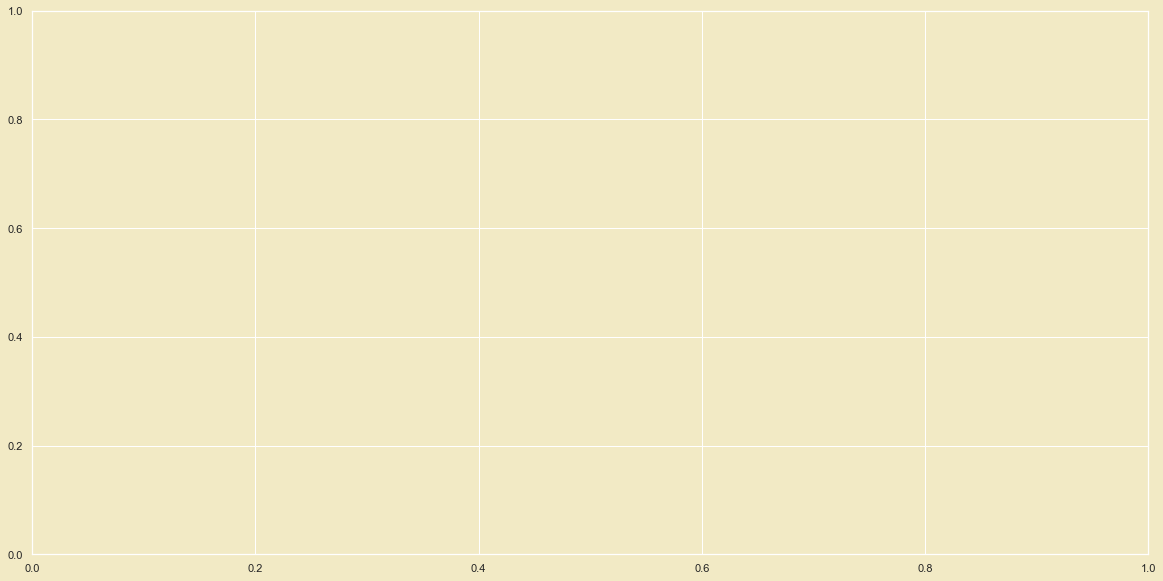

In [31]:
plt.subplots(figsize=(20, 10))
p=sns.barplot(job_titles_series.values,job_titles_series.index,palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nPercentage working abroad of each job\n",fontsize=25)
p.axes.set_xlabel("Percentage working abroad",fontsize=20)
p.axes.set_ylabel("Job Title",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 2, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Nhận xét:**
- Những vai trò quen thuộc luôn chiếm tỉ lệ cao nhất là: Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer.
- Dễ hiểu khi với sự phát triển mạnh mẽ của các ngành khoa học dữ liệu và khoa học máy tính ngày nay thì các công việc vừa nêu là những việc đòi hỏi nguồn nhân lực rất cao trong thời đại ngày nay do đó không chi là môi trường trong nước mà dựa vào việc đầu tư trực tiếp nước ngoài của các quốc gia đang ngày càng được đẩy mạnh thì tỉ lệ làm việc cho các công ty nước ngoài ngày càng cao.
- Các nhà khoa học dữ liệu và khoa học máy tính rất cần thiết cho không chỉ lĩnh vực IT mà còn có vai trò quan trọng trong các vấn đề kinh doanh liên quan đến công nghệ do đó tỉ lệ cao hơn những vai trò hiếm thấy hơn như AI hay NLP Engineer.

## Câu hỏi 5:

### Nội dung câu hỏi

Mức lương trung bình giữa các loại hình lao động (employment_type) của các quy mô công ty (company_size)?

### Ý nghĩa khi trả lời được câu hỏi
Có sự so sánh mức lương trung bình giữa các loại hình lao động của các quy mô công ty. Từ đó, đưa ra lựa chọn loại hình lao động phù hợp nhất đối với quy mô công ty mong muốn.

### Tiền xử lý

Không cần thiết cho câu hỏi này

### Phân tích dữ liệu để trả lời cho câu hỏi

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:
- Tiến hành trực quan hóa bằng barplot (thư viện seaborn) trong đó: trục hoành là quy mô công ty (company_size), trục tung sẽ là mức lương trung bình (salary_in_usd) và trục hue sẽ là loại hình lao động (employment_type)
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

**Code:**

Chúng ta hãy nhìn vào mức lương trung bình giữa các loại hình lao động của các quy mô công ty:


C:\Users\PhiHungTF\AppData\Local\Temp\ipykernel_14472\56631943.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




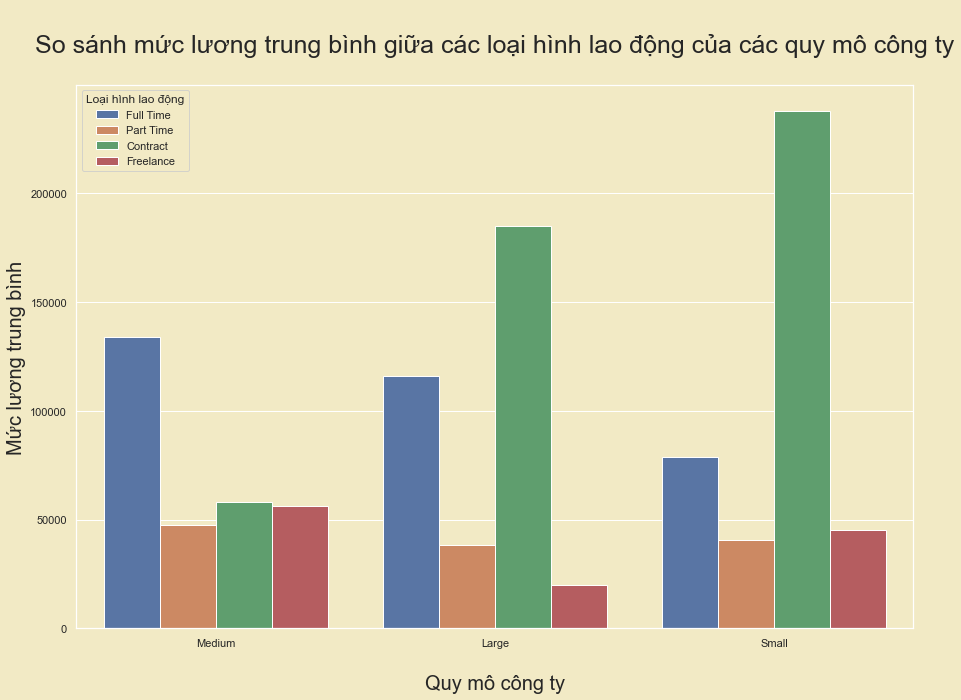

In [32]:
print(f'Chúng ta hãy nhìn vào mức lương trung bình giữa các loại hình lao động của các quy mô công ty:')
plt.subplots(figsize=(15, 10))
p = sns.barplot(data=salaries_df, x='company_size', y='salary_in_usd', hue='employment_type', ci=None)
p.set_title('\nSo sánh mức lương trung bình giữa các loại hình lao động của các quy mô công ty\n', fontsize=25)
p.set_xlabel('\nQuy mô công ty', fontsize=20)
p.set_ylabel('Mức lương trung bình', fontsize=20)
plt.legend(title='Loại hình lao động')
plt.show()

**Nhận xét:**
- Loại hình lao động hợp đồng ở quy mô công ty nhỏ có mức lương trung bình cao hơn hết và trên 200 000 USD. Đây cũng là loại hình cao nhất trong quy mô công ty lớn nhưng dưới 200 000 USD.
- Loại hình lao động toàn thời gian thích hợp nhất cho quy mô công ty vừa vì loại hình này cao hơn khi trong quy mô lớn và nhỏ, cũng như cao nhất trong quy mô vừa.
- Loại hình bán thời gian và tự do có mức lương trung bình được chi trả xấp xỉ nhau trong quy mô vừa và nhỏ; quy mô công ty vừa có phần nhỉnh hơn quy mô nhỏ đối với việc chi trả cho cả hai loại hình này.

## Câu hỏi 6:

### Nội dung câu hỏi

Xu hướng của các hình thức làm việc từ xa (remote_ratio) theo từng năm?

### Ý nghĩa khi trả lời được câu hỏi
Có cái nhìn tổng quát về sự thay đổi ở số lượng và tỉ trọng của các hình thức làm việc từ xa trong ba năm (2020, 2021, 2022). Từ đó, đánh giá được xu hướng của loại hình làm việc từ xa nói chung và các hình thức làm việc từ xa nói riêng.

### Tiền xử lý

Không cần thiết cho câu hỏi này

### Phân tích dữ liệu để trả lời cho câu hỏi

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:

Bước 1:
- Tạo dataframe 'remote_per_year' gồm:
    - 2 index level: 'work_year' (lưu 3 năm: 2020, 2021, 2022) và 'remote_ratio' (lưu các hình thức làm việc từ xa: Fully Remote, Partially Remote, On-site);
    - 2 thuộc tính :'number' (lưu số lượng tương ứng) và percentage (lưu tỉ lệ phần trăm tương ứng).

Bước 2:
- Vẽ linechart để minh họa cho sự thay đổi ở số lượng của các hình thức làm việc từ xa theo từng năm.
- Vẽ từng piechart để minh họa cho sự thay đổi ở tỉ trọng của các hình thức làm việc từ xa theo từng năm tương ứng.
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

**Code bước 1:**

In [33]:
remote_per_year = pd.DataFrame(salaries_df[['work_year', 'remote_ratio']].groupby('work_year').value_counts())
remote_per_year['percentage'] = remote_per_year.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
remote_per_year.columns = ['number', 'percentage']
print(f"Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này :")
remote_per_year

Chúng ta hãy nhìn vào dataframe chứa dữ liệu cần thiết cho câu hỏi này :


number  percentage
work_year remote_ratio                        
2020      Fully Remote      39      52.000000 
          Partially Remote  21      28.000000 
          On-site           15      20.000000 
2021      Fully Remote      119     52.654867 
          Partially Remote  73      32.300885 
          On-site           34      15.044248 
2022      Fully Remote      662     59.001783 
          On-site           413     36.809269 
          Partially Remote  47      4.188948

**Code bước 2:**

Chúng ta hãy nhìn vào sự thay đổi ở số lượng của các hình thức làm việc từ xa theo từng năm:


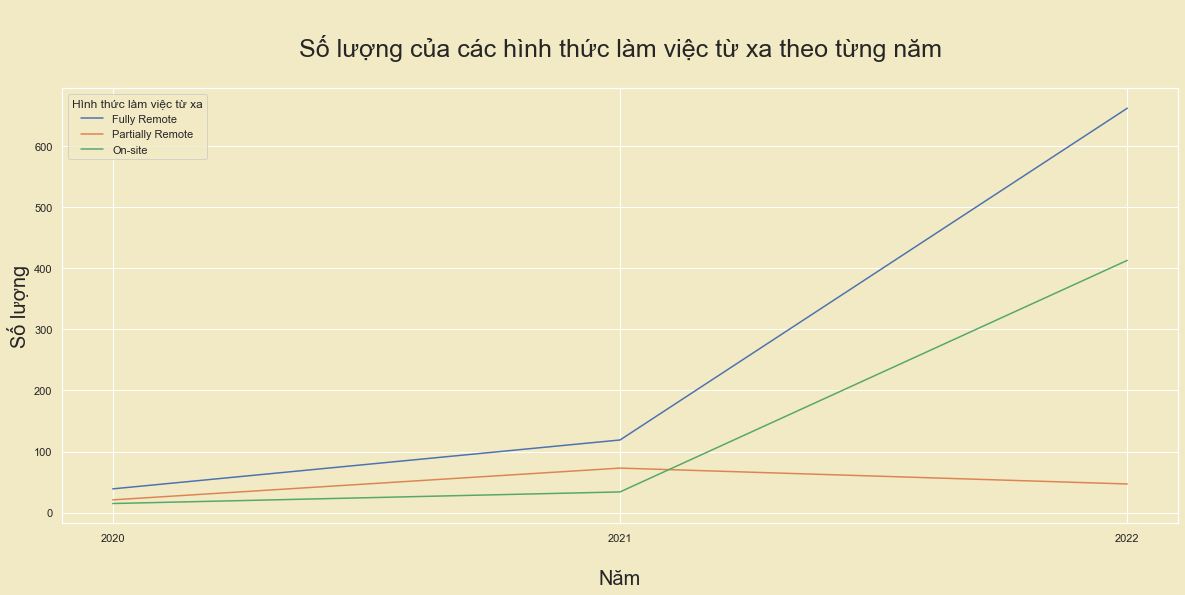

In [34]:
print(f'Chúng ta hãy nhìn vào sự thay đổi ở số lượng của các hình thức làm việc từ xa theo từng năm:')
plt.subplots(figsize=(20, 8))
p = sns.lineplot(data=remote_per_year, x='work_year', y='number', hue='remote_ratio')
p.set_title('\nSố lượng của các hình thức làm việc từ xa theo từng năm\n', fontsize=25)
p.set_xlabel('\nNăm', fontsize=20)
p.set_ylabel('Số lượng', fontsize=20)
p.set_xticks(remote_per_year.index.get_level_values(0).unique())
plt.legend(title='Hình thức làm việc từ xa')
plt.show()

Chúng ta hãy nhìn vào sự thay đổi ở tỉ trọng của các hình thức làm việc từ xa theo từng năm:


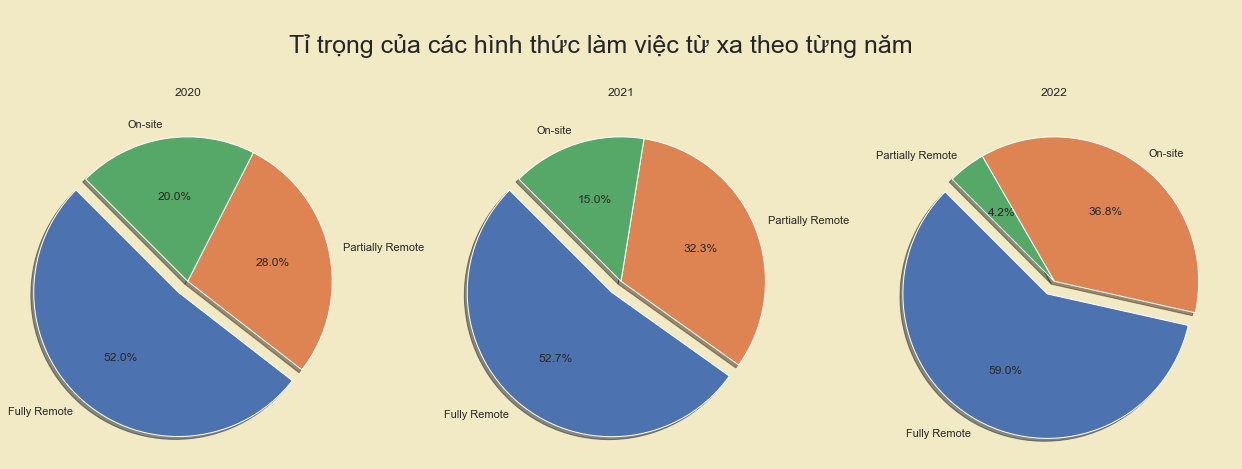

In [35]:

fig, ax = plt.subplots(1, len(remote_per_year.index.get_level_values(0).unique()), figsize=(22, 8))
fig.suptitle('\nTỉ trọng của các hình thức làm việc từ xa theo từng năm', fontsize=25)
print(f'Chúng ta hãy nhìn vào sự thay đổi ở tỉ trọng của các hình thức làm việc từ xa theo từng năm:')
explode = (0.1, 0, 0)
for i in range(len(remote_per_year.index.get_level_values(0).unique())):
    pie_df = remote_per_year.xs(2020 + i, level=0, axis=0, drop_level=False)
    ax[i].pie(pie_df['percentage'].values, labels=pie_df.index.get_level_values(1), explode=explode, autopct='%1.1f%%', shadow=True, startangle=135)
    ax[i].set_title(2020 + i)

**Nhận xét:**
1. Dựa trên sự thay đổi ở số lượng của các hình thức làm việc từ xa theo từng năm:
    - Hình thức làm việc từ xa toàn phần và trực tiếp đều tăng nhẹ từ 2020 đến 2021 và tăng mạnh từ 2021 đến 2022; hình thức từ xa toàn phần có phần tăng nhanh hơn hình thức trực tiếp.
    - Hình thức làm việc từ xa bán phần giữ ở mức ổn định (không biến động mạnh) và bị hình thức trực tiếp vượt mặt nhanh từ sau năm 2021.
2. Dựa trên sự thay đổi ở số lượng của các hình thức làm việc từ xa theo từng năm:
    - Hình thức làm việc từ xa toàn phần luôn chiếm tỉ trọng lớn (hơn $\frac{1}{2}$) và tăng đều.
    - Hình thức làm việc trực tiếp luôn chiếm tỉ trọng lớn hơn $\frac{1}{4}$ và tăng đều.
    - Hình thức làm việc từ xa bán phần giảm mạnh.

Nếu ta giả định tình hình đại dịch Covid-19 ảnh hưởng đến các sự thay đổi này, các nhận xét trên có thể lý giải và kết luận như sau:
- Số lượng của hình thức làm việc trực tiếp giữa 2020 và 2021 bị ảnh hưởng bởi đại dịch nên ít hơn 2 hình thức còn lại, nhưng lại tăng mạnh sau 2021 do đã bình thường hóa Covid-19.
- Số lượng và tỉ trọng của từ xa toàn phần luôn tăng cho thấy đây là hình thức làm việc được ưa chuộng trong những năm sấp tới.
- Hình thức làm việc từ xa bán phần dần bị đào thải do sự giảm mạnh trong tỉ trọng theo từng năm.

## Câu hỏi 7:

### Nội dung câu hỏi

So sánh mức lương trung bình giữa các mức kinh nghiệm (experience level) qua các năm.

### Ý nghĩa khi trả lời được câu hỏi

Có cái nhìn chung về sự thay đổi ở mức lương của các mức kinh nghiệm trong ba năm (2020, 2021, 2022). Từ đó, đánh giá được sự ảnh hưởng của kinh nghiệm làm việc đối với mức lương.

### Tiền xử lí

Không cần thiết cho câu hỏi này

### Phân tích dữ liệu để trả lời cho câu hỏi

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:

Bước 1:
- Tạo dataframe 'year_salary' gồm:
    - cột 'work_year' lưu 3 năm: 2020, 2021, 2022
	- cột 'experience_level' lưu các mức kinh nghiệm: 'Entry-level / Junior', 'Executive-level / Director', 'Mid-level / Intermediate', 'Senior-level / Expert'
    - cột 'salary_in_usd' lưu mức lương trung bình của các mức kinh nghiệm theo từng năm.

Bước 2:
- Vẽ linechart để minh họa cho sự biến đổi ở mức lương trung bình của các mức kinh nghiệm theo từng năm.
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

**Code bước 1:**

In [94]:
year_salary=salaries_df.groupby(["work_year","experience_level"])["salary_in_usd"].mean()
year_salary=year_salary.reset_index()
year_salary

,work_year,experience_level,salary_in_usd
0,2020,Entry-level / Junior,57511.608696
1,2020,Executive-level / Director,202416.500000
2,2020,Mid-level / Intermediate,85950.062500
3,2020,Senior-level / Expert,137240.500000
4,2021,Entry-level / Junior,54385.537037
5,2021,Executive-level / Director,186128.000000
6,2021,Mid-level / Intermediate,81323.977778
7,2021,Senior-level / Expert,125557.458333
8,2022,Entry-level / Junior,65309.410256
9,2022,Executive-level / Director,183878.406250


**Code bước 2:**

In [110]:
fig=px.line(year_salary,x="work_year",y="salary_in_usd",color="experience_level",
            symbol="experience_level", title='Lương trung bình của các mức kinh nghiệm theo từng năm')
fig.update_layout(yaxis_title="Salary $",xaxis_title="Years",xaxis=dict(tickmode='array',tickvals=[2020, 2021, 2022]))

**Nhận xét:**
Mức lương trung bình của từng level có sự chênh lệnh đáng kể. 
 - Level 'Executive-level / Director' có mức lương trung bình cao nhất, dao động từ 180.000 đến 200.000 USD mỗi năm. Mức lương giám đốc giảm dần từ 2020 đến 2022.
 - Level 'Entry-level / Junior' có mức lương trung bình thấp nhất, dao động từ 54.000 đến 65.000 USD. Giảm nhẹ từ 2020 đến 2021, tăng mạnh từ 2021 đến 2022.
 - Hai level 'Mid-level / Intermediate' và 'Senior-level / Expert' có mức lương trung bình ở mức trung bình, dao động từ 80.000 đến 95.000 USD mỗi năm đối với level 'Mid-level / Intermediate' và 125.000 đến 150.000 đối với level 'Senior-level / Expert'. Mức lương của cả hai level này cũng giảm nhẹ vào năm 2021 và tăng mạnh vào năm 2022.


## Câu hỏi 8:

### Nội dung câu hỏi
Top 10 vai trò có mức lương trung bình cao nhất.

### Ý nghĩa khi trả lời được câu hỏi
Câu hỏi này giúp bạn hiểu được các vai trò có mức lương cao nhất, từ đó có thể đưa ra các đánh giá xu hướng việc làm trong tương lai.

### Tiền xử lý
Không cần thiết cho câu hỏi này.

### Phân tích dữ liệu để trả lời câu hỏi

Để trả lời cho câu hỏi này, bạn sẽ làm như sau:

Bước 1:
- Tạo dataframe 'role_salary' gồm:
    - cột 'job_title' lưu các tên công việc (vai trò).
    - cột 'salary_in_usd' lưu mức lương cao nhất của từng vai trò.

Bước 2:
- Vẽ barchart để minh họa cho mức lương cao nhất của các vai trò.
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

In [99]:
role_salary = salaries_df.groupby('job_title',as_index=False)['salary_in_usd'].mean()
role_salary = role_salary.sort_values(by='salary_in_usd',ascending=False)
role_salary

,job_title,salary_in_usd
1,Applied Scientist,179600.000000
4,Data Architect,163759.477273
6,Data Scientist,134376.689732
5,Data Engineer,129685.280000
8,Machine Learning Scientist,128871.064516
7,Machine Learning Engineer,127952.096000
10,Research Scientist,108845.950000
3,Data Analyst,102503.697819
0,AI Scientist,78964.333333
2,Computer Vision Engineer,47236.000000


In [111]:
fig=px.bar(role_salary, x='job_title',y='salary_in_usd',color='job_title',
	labels={'job_title':'Job Title','salary_in_usd':'Salary $'},
	title='Top 10 Vai trò được trả lương cao nhất trong Khoa học dữ liệu')
fig.show()

**Nhận xét:**
- Đứng đầu bảng xếp hạng là vai trò "Applied Scientist" với mức lương trung bình 180.000 USD mỗi năm. Khoa học ứng dụng là ngành khoa học sử dụng phương pháp khoa học và kiến thức thu được thông qua các kết luận từ phương pháp để đạt được các mục tiêu thực tiễn. Có thể nói đây là một trong những ngành học có mức lương cao nhất hiện nay.
- Tiếp đến các các ngành về Data: Data Architect, Data Scientist và Data Engineer đều có mức lương trung bình khá cao từ 130.000 đến 160.000 USD mỗi năm. Đây là những ngành học có xu hướng phát triển rất mạnh trong thời gian tới.